# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
headers = {"User-Agent": "MafiaAzulBr", "Project": "MyDataScienceProject/1.0"}

respuesta = requests.get(url, timeout=3.5, headers=headers)
print("Situación:", respuesta.status_code)

Situación: 200


In [6]:
tablas = pd.read_html(respuesta.text)
print(f"Se encontraron {len(tablas)} tablas.")

df = tablas[0]
df["Streams (billions)"] = pd.to_numeric(df["Streams (billions)"], errors="coerce")

Se encontraron 27 tablas.


/tmp/ipykernel_1817/4141435267.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablas = pd.read_html(respuesta.text)


In [7]:
with sqlite3.connect("spotify_top_canciones.db") as conexion:
    df.to_sql("mas_sonados", conexion, if_exists="replace", index=False)
    count = pd.read_sql("SELECT COUNT(*) FROM mas_sonados", conexion).iloc[0,0]
    print("Filas insertadas:", count)

Filas insertadas: 101


Situación: 200


/tmp/ipykernel_3160/2182341657.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablas = pd.read_html(respuesta.text)


Se encontraron 27 tablas.
Filas insertadas: 101


/tmp/ipykernel_3160/2182341657.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


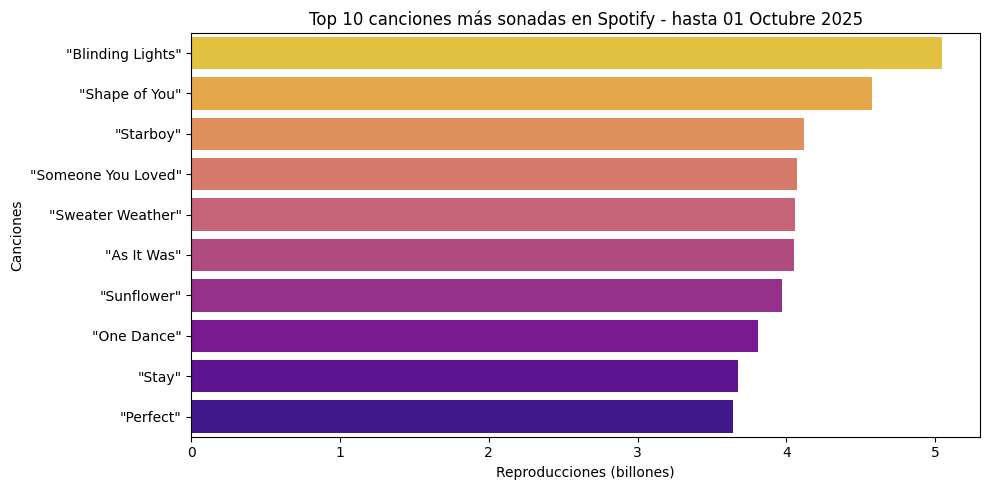

In [ ]:

top10 = df.nlargest(10, "Streams (billions)")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x="Streams (billions)",
    y="Song",
    palette="plasma_r",
    dodge=False
)
plt.title("Top 10 canciones más sonadas en Spotify - hasta 01 Octubre 2025")
plt.xlabel("Reproducciones (billones)")
plt.ylabel("Canciones")
plt.tight_layout()
plt.show()